In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [2]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams["font.size"] = 12
plt.rcParams['xtick.labelsize'] = 12.
plt.rcParams['ytick.labelsize'] = 12.
plt.rcParams['axes.unicode_minus'] = False

In [3]:
CHART_NAME = 'seabornWelfare'
cnt, PNG, UNDERBAR = 0, '.png', '_'
filename = '/content/gdrive/MyDrive/학교/학교 수업/3-1/데이터시각화/data/welfare_python.csv'

In [4]:
import pandas as pd
welfare = pd.read_csv(filename, encoding='utf-8')

print(welfare.columns)

Index(['gender', 'birth', 'marriage', 'religion', 'code_job', 'income',
       'code_religion'],
      dtype='object')


In [5]:
print(welfare)

       gender  birth  marriage  religion  code_job  income  code_religion
0           2   1936         2         2       NaN     NaN              1
1           2   1945         2         2       NaN     NaN              1
2           1   1948         2         2     942.0   120.0              1
3           1   1942         3         1     762.0   200.0              1
4           2   1923         2         1       NaN     NaN              1
...       ...    ...       ...       ...       ...     ...            ...
16659       2   1967         1         1       NaN     NaN              5
16660       2   1992         5         1     314.0   302.5              5
16661       1   1995         5         1       NaN     NaN              5
16662       2   1998         0         1       NaN     NaN              5
16663       1   2001         0         1       NaN     NaN              5

[16664 rows x 7 columns]


In [6]:
### 데이터 전처리 ###############################################################
welfare.loc[welfare['gender'] == 1 , ['gender']] = '남성'
welfare.loc[welfare['gender'] == 2 , ['gender']] = '여성'

In [7]:
print(welfare)

      gender  birth  marriage  religion  code_job  income  code_religion
0         여성   1936         2         2       NaN     NaN              1
1         여성   1945         2         2       NaN     NaN              1
2         남성   1948         2         2     942.0   120.0              1
3         남성   1942         3         1     762.0   200.0              1
4         여성   1923         2         1       NaN     NaN              1
...      ...    ...       ...       ...       ...     ...            ...
16659     여성   1967         1         1       NaN     NaN              5
16660     여성   1992         5         1     314.0   302.5              5
16661     남성   1995         5         1       NaN     NaN              5
16662     여성   1998         0         1       NaN     NaN              5
16663     남성   2001         0         1       NaN     NaN              5

[16664 rows x 7 columns]


In [8]:
print('\n# 나이 컬럼은 존재하지 않으므로 생일 컬럼을 이용하여 산술 연산합니다.')
thisyear = 2020
welfare['age'] = thisyear - welfare['birth'] + 1

print(welfare)


# 나이 컬럼은 존재하지 않으므로 생일 컬럼을 이용하여 산술 연산합니다.
      gender  birth  marriage  religion  code_job  income  code_religion  age
0         여성   1936         2         2       NaN     NaN              1   85
1         여성   1945         2         2       NaN     NaN              1   76
2         남성   1948         2         2     942.0   120.0              1   73
3         남성   1942         3         1     762.0   200.0              1   79
4         여성   1923         2         1       NaN     NaN              1   98
...      ...    ...       ...       ...       ...     ...            ...  ...
16659     여성   1967         1         1       NaN     NaN              5   54
16660     여성   1992         5         1     314.0   302.5              5   29
16661     남성   1995         5         1       NaN     NaN              5   26
16662     여성   1998         0         1       NaN     NaN              5   23
16663     남성   2001         0         1       NaN     NaN              5   20

[16664 rows x 8 colum

In [9]:
def setMarriage( x ):
    if x == 1 :
        return '결혼'
    elif x == 3 :
        return '이혼'
    else :
        return '무응답' # 결측치

# 결혼 : 숫자 1이면 결혼, 3이면 이혼, 이외에는 결측치로 처리 (Apply함수)
welfare['marriage'] = welfare['marriage'].apply(setMarriage)

In [10]:
print(welfare)

      gender  birth marriage  religion  code_job  income  code_religion  age
0         여성   1936      무응답         2       NaN     NaN              1   85
1         여성   1945      무응답         2       NaN     NaN              1   76
2         남성   1948      무응답         2     942.0   120.0              1   73
3         남성   1942       이혼         1     762.0   200.0              1   79
4         여성   1923      무응답         1       NaN     NaN              1   98
...      ...    ...      ...       ...       ...     ...            ...  ...
16659     여성   1967       결혼         1       NaN     NaN              5   54
16660     여성   1992      무응답         1     314.0   302.5              5   29
16661     남성   1995      무응답         1       NaN     NaN              5   26
16662     여성   1998      무응답         1       NaN     NaN              5   23
16663     남성   2001      무응답         1       NaN     NaN              5   20

[16664 rows x 8 columns]


In [11]:
print('\n# 월급 결측치 개수 구하기 before')
print(sum(welfare['income'].isnull()))


# 월급 결측치 개수 구하기 before
12030


In [12]:
# 결측치 평균 대체
welfare.loc[welfare['income'].isnull(), 'income'] = welfare['income'].mean()

print('\n# 월급 결측치 개수 구하기 after')
print(sum(welfare['income'].isnull()))


# 월급 결측치 개수 구하기 after
0


In [13]:
def setReligion_txt( x ):
    if int(x) == 1 :
        return '있슴'
    else :
        return '없슴'

print("welfare['religion'].unique()")
print(welfare['religion'].unique())

welfare['religion'].unique()
[2 1]


In [14]:
welfare['religion'] = welfare['religion'].apply(setReligion_txt)
print(sum(welfare['religion'].isnull()))

0


In [15]:
job_file = '/content/gdrive/MyDrive/학교/학교 수업/3-1/데이터시각화/data/welfare_job.csv'
jobframe = pd.read_csv(job_file, encoding='cp949')

print("welfare['code_job'].unique()")
print(welfare['code_job'].unique())

welfare['code_job'].unique()
[  nan  942.  762.  530.  999.  312.  254.  510.  286.  521.  773.  314.
  941.  951.  274.  873.  320.  952.  151.  152.  772.  852.  442.  991.
  422.  313.  710.  522.  399.  753.  851.  235.  231.  311.  721.  953.
  930.  863.  910.  392.  761.  922.  285.  875.  862.  421.  243.  223.
  252.  259.  771.  135.  245.  221.  751.  251.  141.  722.  246.  289.
  281.  741.  261.  247.  441.  864.  222.  411.  799.  743.  780.  149.
  891.  823.  159.  248.  874.  892.  241.  239.  791.  271.  871.  391.
  620.  131.  431.  811.  272.  429.  213.  842.  283.  284.  134.  611.
  236.  792.  855.  234.  861.  921.  253.  752.  841.  330.  233.  899.
  139.  432.  212.  423.  730.  273.  211.  412.  120.  992.  854.  822.
  831.  853.  832.  612.  821.  613.  774.  132. 1011.  237.  153.  133.
  224.  882.  242.  244.  232.  630.  742.  843. 1012.  881.  812.  819.
  111.  876.]


In [16]:
print(jobframe)

     code_job                  job
0         111  의회의원 고위공무원 및 공공단체임원
1         112               기업고위임원
2         120        행정 및 경영지원 관리자
3         131    연구 교육 및 법률 관련 관리자
4         132          보험 및 금융 관리자
..        ...                  ...
144       991        농립어업관련 단순 종사원
145       992  계기검침 수금 및 주차 관련 종사원
146       999      기타 서비스관련 단순 종사원
147      1011                   장교
148      1012          장기 부사관 및 준위

[149 rows x 2 columns]


In [17]:
# merge 활용해서 두개의 데이터프레임 합치기 
print('\n# merge() 함수의 left_on과 right_on 사용하기')
welfare = pd.merge( welfare, jobframe, left_on='code_job', right_on='code_job')
print(welfare)

print("welfare['code_religion'].unique()")
print(welfare['code_religion'].unique())


# merge() 함수의 left_on과 right_on 사용하기
     gender  birth marriage religion  code_job       income  code_religion  \
0        남성   1948      무응답       없슴     942.0   120.000000              1   
1        남성   1945       이혼       없슴     942.0   220.200000              1   
2        남성   1946       결혼       없슴     942.0   139.000000              1   
3        남성   1953       결혼       없슴     942.0   150.000000              1   
4        남성   1960       결혼       있슴     942.0   166.000000              1   
...     ...    ...      ...      ...       ...          ...            ...   
7524     여성   1950       결혼       있슴     819.0   241.619016              6   
7525     남성   1960       결혼       있슴     111.0   250.000000              7   
7526     남성   1960       결혼       없슴     111.0  1250.000000              1   
7527     남성   1992      무응답       있슴     876.0   280.000000              3   
7528     남성   1935       결혼       있슴     876.0   156.000000              3   

      age                

In [18]:
def setReligion_txt( x ):
    if int(x) == 1 :
        return '서울'
    elif int(x) == 2 :
        return '수도권'
    elif int(x) == 3:
        return '부산/경남/울산'
    elif int(x) == 4 :
        return '대구/경북'
    elif int(x) == 5 :
        return '대전/충남'
    elif int(x) == 6 :
        return '강원/충북'
    elif int(x) == 7 :
        return '광주/전남/전북/제주도'

welfare['code_religion'] = welfare['code_religion'].apply(setReligion_txt)

In [19]:
# 청년_young(30세 미만), 중년_middle(30세 이상), 노년_old(60세 이상)
def newAge(x):
    if x < 30:
        return '청년'
    elif x >= 30 and x < 60:
        return '중년'
    else :
        return '노년'

welfare['ageg'] = welfare['age'].apply(newAge)

print(welfare[['age', 'ageg']].head())

   age ageg
0   73   노년
1   76   노년
2   75   노년
3   68   노년
4   61   노년


In [21]:
col_mapping = {'gender':'성별', 'birth':'생일', 'marriage':'결혼 유무', 'religion':'종교 유무', 'code_job':'직업 코드', 'income':'소득', 'code_religion':'지역구', 'age':'나이', 'job':'직업', 'ageg':'연령대'}
welfare = welfare.rename(columns = col_mapping)

welfare.to_csv('welfareClean.csv', index=False, encoding='cp949')

In [22]:
print(welfare.columns)

print(welfare.head(10))

print(welfare.describe())

print(welfare['결혼 유무'].unique())

print(welfare['종교 유무'].unique())

print(welfare['지역구'].unique())

print(welfare['직업'].unique())

print(welfare['연령대'].unique())

Index(['성별', '생일', '결혼 유무', '종교 유무', '직업 코드', '소득', '지역구', '나이', '직업', '연령대'], dtype='object')
   성별    생일 결혼 유무 종교 유무  직업 코드          소득  지역구  나이         직업 연령대
0  남성  1948   무응답    없슴  942.0  120.000000   서울  73  경비원 및 검표원  노년
1  남성  1945    이혼    없슴  942.0  220.200000   서울  76  경비원 및 검표원  노년
2  남성  1946    결혼    없슴  942.0  139.000000   서울  75  경비원 및 검표원  노년
3  남성  1953    결혼    없슴  942.0  150.000000   서울  68  경비원 및 검표원  노년
4  남성  1960    결혼    있슴  942.0  166.000000   서울  61  경비원 및 검표원  노년
5  남성  1939    결혼    있슴  942.0  241.619016   서울  82  경비원 및 검표원  노년
6  남성  1947    결혼    있슴  942.0  150.000000  수도권  74  경비원 및 검표원  노년
7  남성  1952    이혼    없슴  942.0  170.000000   서울  69  경비원 및 검표원  노년
8  남성  1949    결혼    있슴  942.0  100.000000   서울  72  경비원 및 검표원  노년
9  남성  1942    결혼    있슴  942.0  120.000000   서울  79  경비원 및 검표원  노년
                생일        직업 코드           소득           나이
count  7529.000000  7529.000000  7529.000000  7529.000000
mean   1964.012087   591.243724   241.619016    56.9

In [23]:
def FileSave():
    global cnt
    cnt += 1
    savefile = CHART_NAME + UNDERBAR + str(cnt).zfill(2) + PNG
    plt.savefig(savefile, dpi=400)
    print(savefile + ' 파일이 저장되었습니다.')
# end def FileSave():

결혼 유무 빈도
결혼 유무
결혼     5307
무응답    1803
이혼      419
Name: 결혼 유무, dtype: int64
seabornWelfare_01.png 파일이 저장되었습니다.


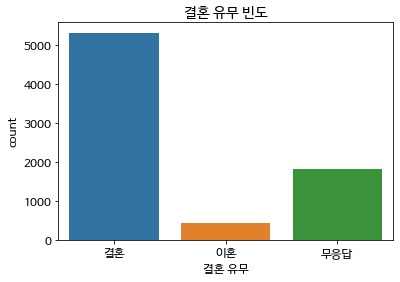

In [24]:
print('결혼 유무 빈도')
result = welfare.groupby('결혼 유무')['결혼 유무'].count()
print(result)

ORDERING = ['결혼', '이혼', '무응답']
plt.figure()
plt.title('결혼 유무 빈도')

import seaborn as sns
sns.countplot(x='결혼 유무', data=welfare, order=ORDERING)
FileSave()

결혼 유무 vs 종교 유무 빈도
결혼 유무  종교 유무
결혼     없슴       2778
       있슴       2529
무응답    없슴        932
       있슴        871
이혼     없슴        247
       있슴        172
Name: 결혼 유무, dtype: int64
seabornWelfare_02.png 파일이 저장되었습니다.


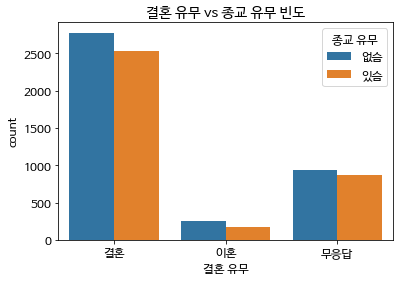

In [25]:
print('결혼 유무 vs 종교 유무 빈도')
result = welfare.groupby(['결혼 유무', '종교 유무'])['결혼 유무'].count()
print(result)

plt.figure()
plt.title('결혼 유무 vs 종교 유무 빈도')
sns.countplot(x='결혼 유무', hue='종교 유무', data=welfare, order=ORDERING)
FileSave()

<ipython-input-26-fbd21b3b9d9d>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, rug=True, hist=False, kde=True)


seabornWelfare_03.png 파일이 저장되었습니다.


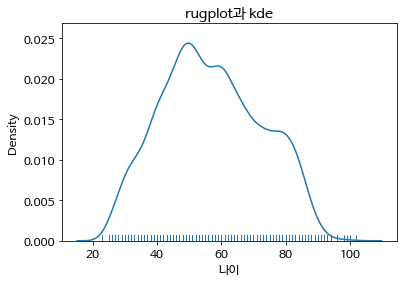

In [26]:
x = welfare['나이']

plt.figure()
plt.title('rugplot과 kde')
sns.distplot(x, rug=True, hist=False, kde=True)
FileSave()

<ipython-input-27-a4595f5312d4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x, rug=False, hist=True, kde=True, label='asdf')


seabornWelfare_04.png 파일이 저장되었습니다.


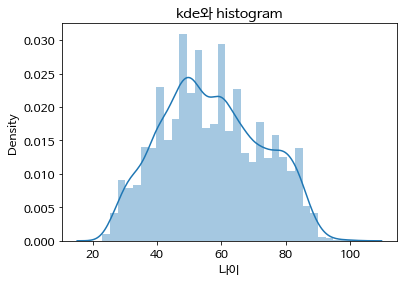

In [27]:
plt.figure() # kde(kernel density)
plt.title('kde와 histogram')
sns.distplot(x, rug=False, hist=True, kde=True, label='asdf')
FileSave()

pivot_table을 이용한 시각화
결혼 유무         결혼        무응답        이혼
성별                                   
남성     59.806978  43.629973  58.57767
여성     58.890179  53.913251  57.28169
seabornWelfare_05.png 파일이 저장되었습니다.


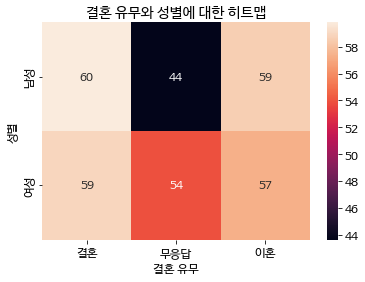

In [28]:
pivot = welfare.pivot_table(index='성별', columns='결혼 유무', values='나이')
print('pivot_table을 이용한 시각화')
print(pivot)

plt.figure()
plt.title('결혼 유무와 성별에 대한 히트맵')
sns.heatmap(data=pivot, annot=True)
FileSave()


상관 관계 시각화
             생일     직업 코드        소득        나이
생일     1.000000 -0.287829  0.093783 -1.000000
직업 코드 -0.287829  1.000000 -0.287414  0.287829
소득     0.093783 -0.287414  1.000000 -0.093783
나이    -1.000000  0.287829 -0.093783  1.000000
seabornWelfare_06.png 파일이 저장되었습니다.


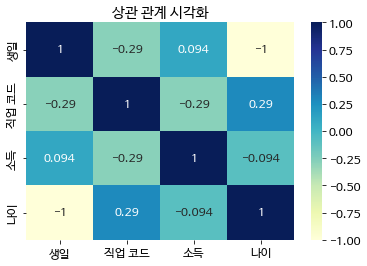

In [29]:
# correlation(상관관계)를 시각화
# corr() 함수는 데이터의 상관 관계를 보여줍니다.
cor = welfare.corr()
print('상관 관계 시각화')
print(cor)

plt.figure()
plt.title('상관 관계 시각화')
sns.heatmap(data=cor, annot=True, cmap="YlGnBu")
FileSave()

seabornWelfare_07.png 파일이 저장되었습니다.


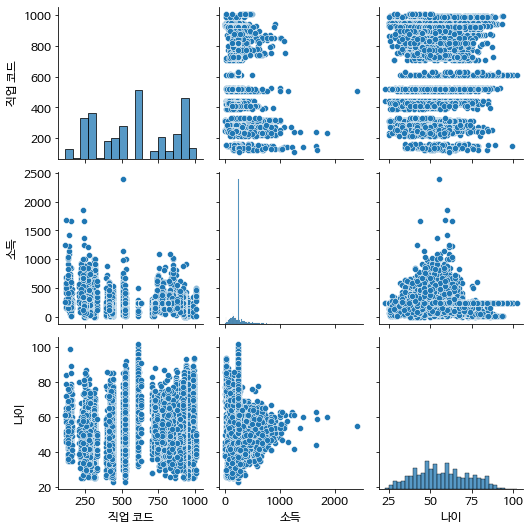

In [30]:
newwelfare = welfare.loc[:, ['직업 코드', '소득', '나이', '결혼 유무']]

sns.pairplot(data=newwelfare)
FileSave()

welfare['나이'].describe()
count    7529.000000
mean       56.987913
std        15.524029
min        23.000000
25%        45.000000
50%        56.000000
75%        69.000000
max       102.000000
Name: 나이, dtype: float64
seabornWelfare_08.png 파일이 저장되었습니다.


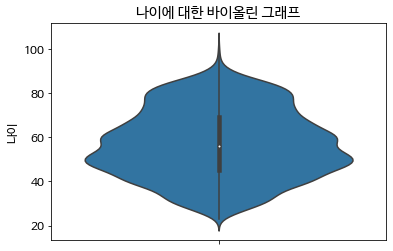

In [31]:
print("welfare['나이'].describe()")
print(welfare['나이'].describe())

plt.figure()
plt.title('나이에 대한 바이올린 그래프')
sns.violinplot(y='나이', data=welfare)
FileSave()

x, y축을 지정해 줌으로써 바이올린을 분할하여 비교 분포를 볼 수 있습니다.
seabornWelfare_09.png 파일이 저장되었습니다.


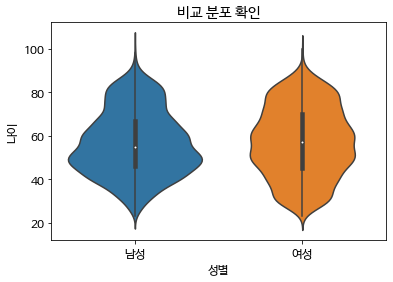

In [32]:
print('x, y축을 지정해 줌으로써 바이올린을 분할하여 비교 분포를 볼 수 있습니다.')
plt.figure()
plt.title('비교 분포 확인')
sns.violinplot(x='성별', y='나이', data=welfare)
FileSave()

seabornWelfare_10.png 파일이 저장되었습니다.


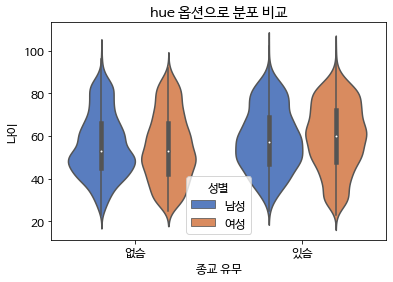

In [33]:
plt.figure()
plt.title('hue 옵션으로 분포 비교')
sns.violinplot(x='종교 유무', y='나이', hue='성별', data=welfare, palette="muted")
FileSave()

seabornWelfare_11.png 파일이 저장되었습니다.


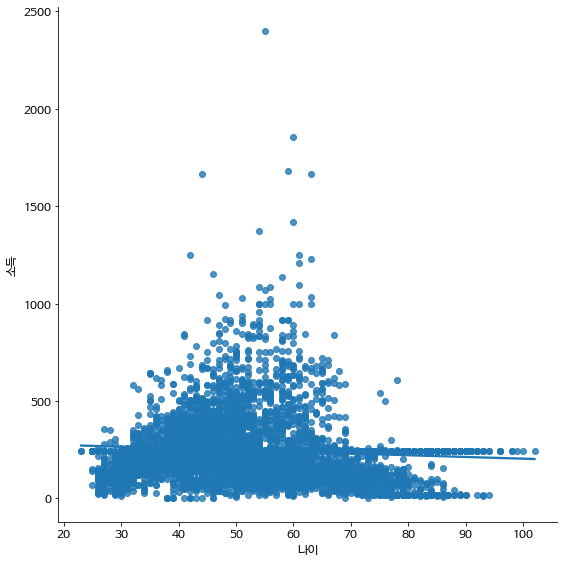

In [34]:
sns.lmplot(x='나이', y='소득', height=8, data=welfare)
FileSave()

seabornWelfare_12.png 파일이 저장되었습니다.


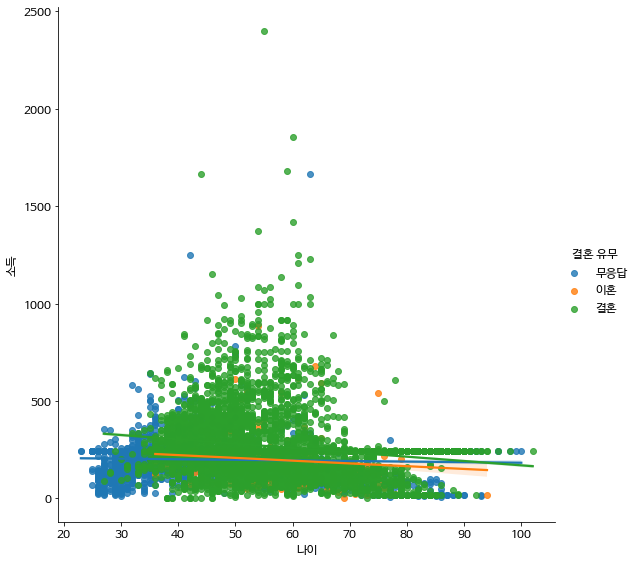

In [35]:
sns.lmplot(x='나이', y='소득', hue='결혼 유무', height=8, data=welfare)
FileSave()

seabornWelfare_13.png 파일이 저장되었습니다.


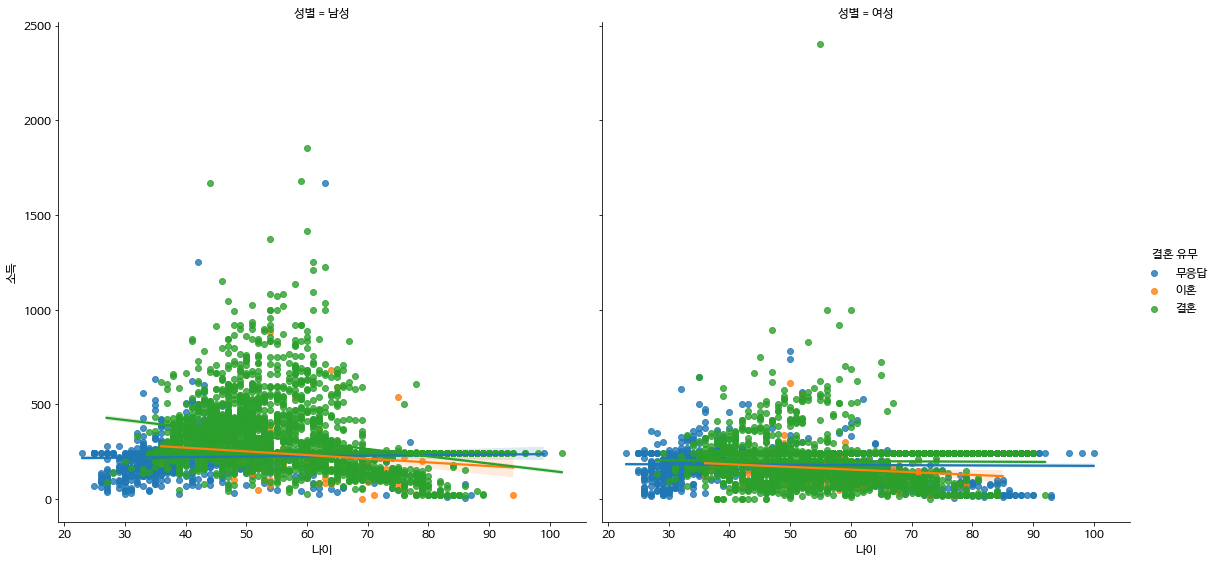

In [36]:
sns.lmplot(x='나이', y='소득', hue='결혼 유무', col='성별', col_wrap=2, height=8, data=welfare)
FileSave()

seabornWelfare_14.png 파일이 저장되었습니다.


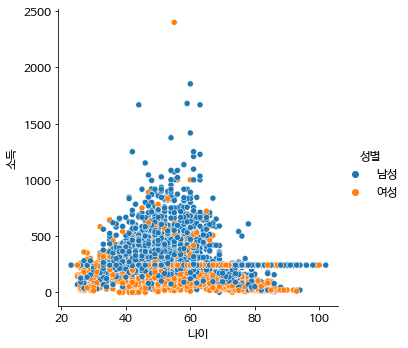

In [37]:
sns.relplot(x='나이', y='소득', hue='성별', data=welfare)
FileSave()

seabornWelfare_15.png 파일이 저장되었습니다.


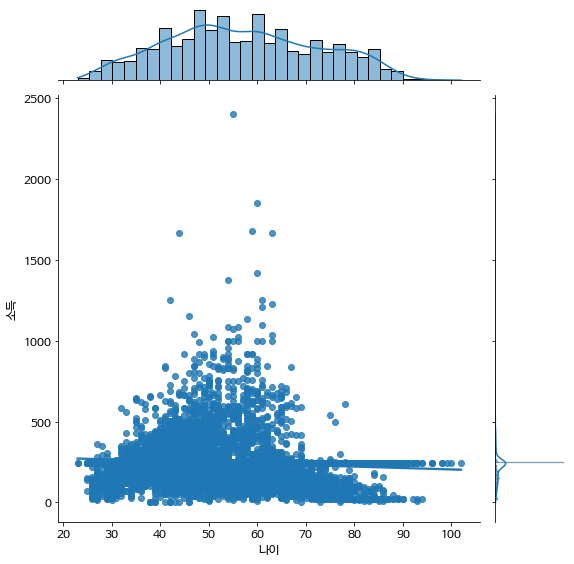

In [38]:
sns.jointplot(x='나이', y='소득', height=8, data=welfare, kind="reg")
FileSave()

seabornWelfare_16.png 파일이 저장되었습니다.


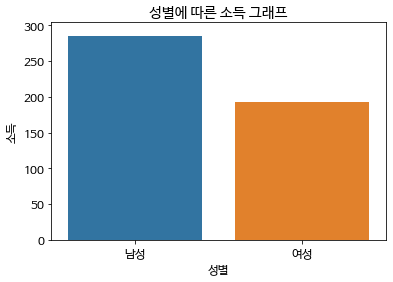

In [39]:
ax = plt.subplots()
ax = sns.barplot(x='성별', y='소득', data=welfare, errwidth=0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
FileSave()

seabornWelfare_17.png 파일이 저장되었습니다.


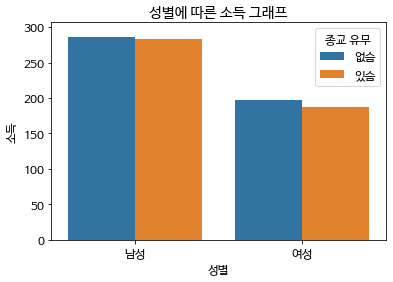

In [40]:
ax = plt.subplots()
ax = sns.barplot(x='성별', y='소득', hue='종교 유무', data=welfare, errwidth=0)
ax.set_title('성별에 따른 소득 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
FileSave()

seabornWelfare_18.png 파일이 저장되었습니다.


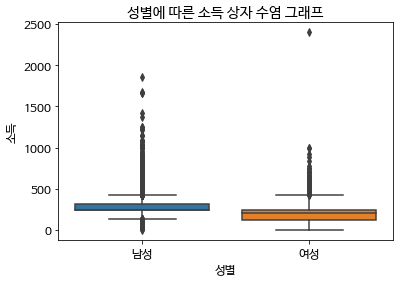

In [41]:
ax = plt.subplots()
ax = sns.boxplot(x='성별', y='소득', data=welfare)
ax.set_title('성별에 따른 소득 상자 수염 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
FileSave()

In [ ]:
newwelfare = welfare.loc[ welfare['소득'] <= 400 ]
ax = plt.subplots()
ax = sns.boxplot(x='성별', y='소득', data=newwelfare)
ax.set_title('성별에 따른 소득 상자 수염 그래프')
ax.set_xlabel('성별')
ax.set_ylabel('소득')
FileSave()